In [1]:
Base.chr2ind(m::IJulia.Msg, str::String, ic::Int64) = Base.chr2ind(m, str, Int32(ic))

# Uniform distribution over the boundary of the cell

In [2]:
using DynamicalBilliards
DynamicalBilliards.enableplotting()

using PyPlot

## Hexagonal cell (Infinite-Horizon regime)

In [5]:
space = 3.0 # Space between two adjacent disks
r = 1.0 # Radius of the disk

polygon_sides = 6

bth = billiard_polygon(polygon_sides, space/sqrt(3); setting = "periodic")
d = Disk([0.,0.], r)
push!(bth, d)

t = 1000.0
Npart = 20000 ;

In [6]:
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);

In [19]:
x = birkres[:,1];
y = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Distances

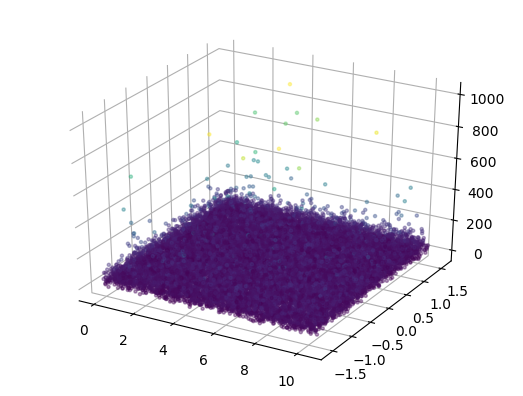

In [17]:
## Scatter
fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](birkres[:,1],birkres[:,2], birkres[:,3], c=birkres[:,3], s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))


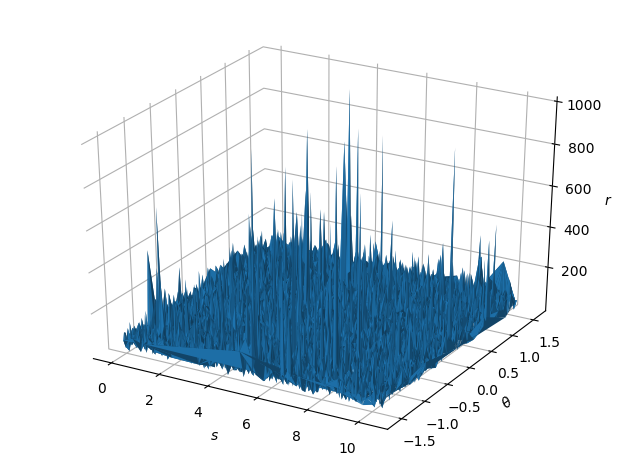

PyObject <matplotlib.text.Text object at 0xd21699ec>

In [18]:
## Density

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](x,y,distances)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$r$")

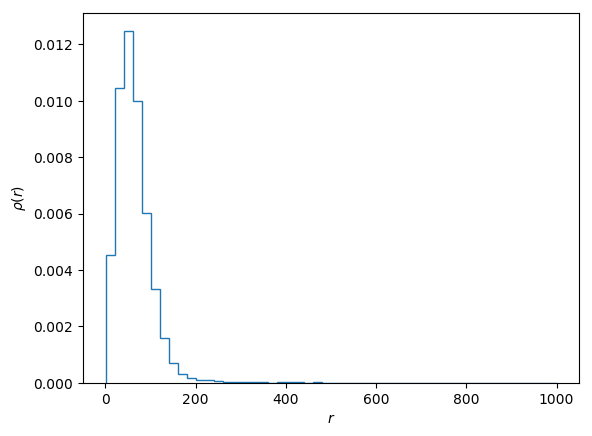

PyObject <matplotlib.text.Text object at 0xd0405bac>

In [23]:
## Histogram
plt[:hist](birkres[:,3], normed = true, 50, histtype = "step");
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

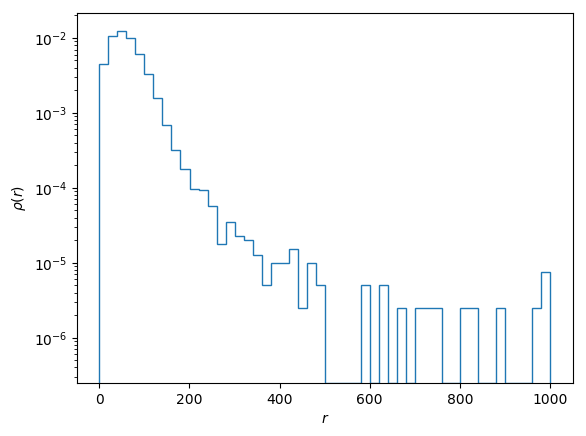

PyObject <matplotlib.text.Text object at 0xd0db09ec>

In [26]:
## Histogram -Logarithmic scale
plt[:hist](birkres[:,3], normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

### Lyapunov Exponents

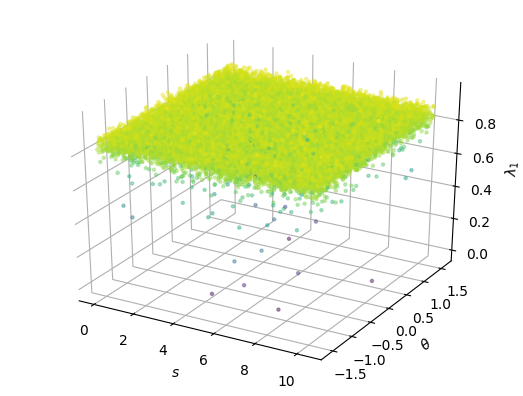

PyObject <matplotlib.text.Text object at 0xd0dd9aac>

In [27]:
## Scatter

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](birkres[:,1],birkres[:,2], birkres[:,4], c=birkres[:,4], s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$\lambda_1$")

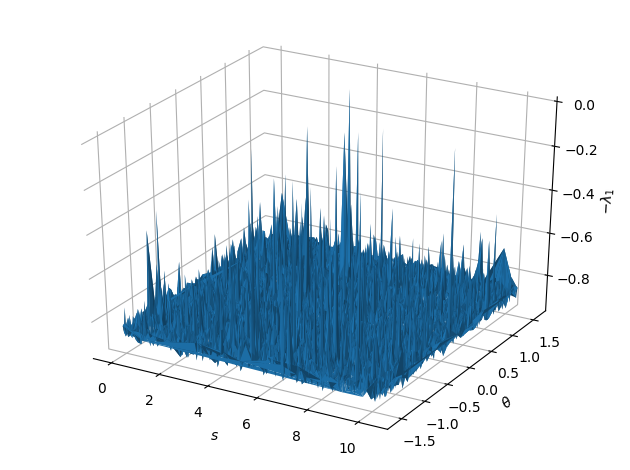

PyObject <matplotlib.text.Text object at 0xceca524c>

In [33]:
## Density (-λ_1)

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](x,y,-1.*lyapunov, linewidth = 0)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$-\lambda_1$")

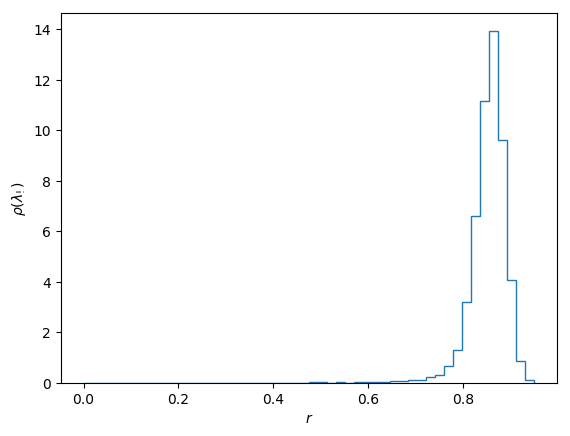

In [36]:
## Histogram
plt[:hist](birkres[:,4], normed = true, 50, histtype = "step");
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(\lambda_!)$");


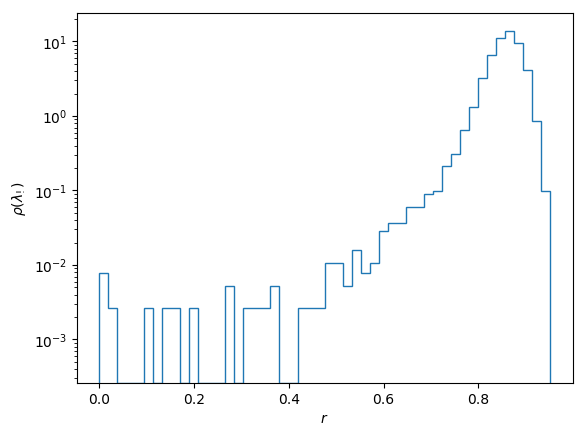

In [37]:
## Histogram
plt[:hist](birkres[:,4], normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(\lambda_!)$");

## Comparison

In [39]:
rare = birkres[find(lyapunov .< 0.1),:] #Distance is the third column

4×4 Array{Float64,2}:
 4.41808  -1.04701   1000.0    0.0      
 9.94356   0.208263   967.125  0.0320301
 7.69385  -1.04701   1000.0    0.0      
 4.26929   1.04732   1000.0    0.0      

We can note that rare events with vanishing Lyapunov exponents have the 
highest values of displacements. It is worth noting that 3 rare values occur at a similar angle